In [2]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
df = pd.read_csv("Uber Request Data.csv") #Reading data set for analysis
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/07/2016 11:51,11/07/2016 13:00
1,867,Airport,1.0,Trip Completed,11/07/2016 17:57,11/07/2016 18:47
2,1807,City,1.0,Trip Completed,12/07/2016 09:17,12/07/2016 09:58
3,2532,Airport,1.0,Trip Completed,12/07/2016 21:08,12/07/2016 22:03
4,3112,City,1.0,Trip Completed,13/07/2016 08:33,13/07/2016 09:25


In [4]:
print(df.info())
print("Shape of dataset: \n",df.shape)
print("Description of the dataset: \n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None
Shape of dataset: 
 (6745, 6)
Description of the dataset: 
         Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


In [5]:
# Finding the Sum of null values
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
# Replacing "/" with "-" in time stamp
df["Request timestamp"]=df["Request timestamp"].str.replace("/","-")
df["Drop timestamp"]=df["Drop timestamp"].str.replace("/","-")

In [7]:
#changing the datetime to proper format
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst = True)
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst = True)

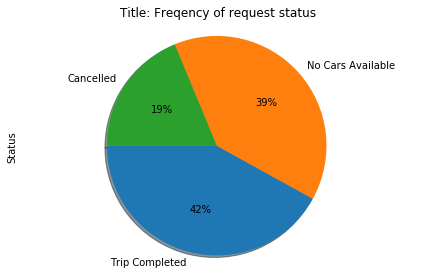

In [8]:
#Plotting pie chart for the frequency of status
df.Status.value_counts().plot(kind="pie",startangle = 180,radius=1.10,autopct="%0.0f%%",shadow=True)
plt.title("Title: Freqency of request status")
plt.tight_layout()
plt.axis("equal")
plt.show()

In [9]:
# Editing given data - Extracting date and hours from timestamp
df["Request_hour"] = df["Request timestamp"].dt.hour
df["Request_date"] = df["Request timestamp"].dt.date
df["Request_time"] = df["Request timestamp"].dt.hour
df["Drop_time"] = df["Drop timestamp"].dt.time

In [10]:
# Distributing hours into timeslots
df["Timeslots"] = pd.cut(df.Request_hour,[0,4,8,12,16,20,24], labels=['night','Early morning','morning','noon','Evening','late Evening'],right=False)

In [11]:
# Distributing Request type
df["Request_type"] = df["Pickup point"].apply(lambda x:"Airport to City" if x == "Airport" else "City to Airport")

In [12]:
uber = df.groupby(["Status","Request_type"]).Timeslots.value_counts().unstack()

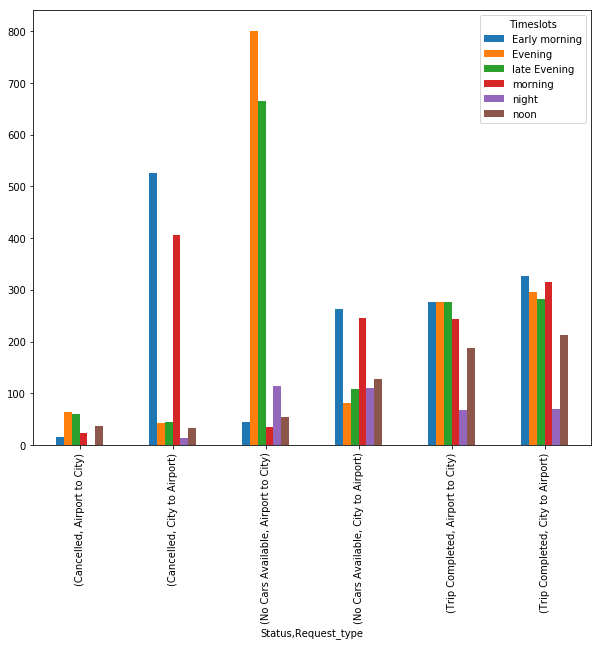

In [13]:
uber.plot(kind="bar",align='center', alpha=1.0,figsize=(10,8));

In [14]:
#Grouping timeslots, Requesttype ,and status_frequency
group = df.groupby(["Timeslots","Request_date","Request_type"]).Status.value_counts()

In [15]:
# Creating different groups (group1 , group2 , group3) according to the status of cars
group1 = group.unstack().drop(["No Cars Available","Trip Completed"],1).unstack()
group2 = group.unstack().drop(["Cancelled","Trip Completed"],1).unstack()
group3 = group.unstack().drop(["No Cars Available","Cancelled"],1).unstack()
group1.columns = ['Airport to City','City to Airport']
group2.columns = ['Airport to City','City to Airport']
group3.columns = ['Airport to City','City to Airport']
group1.columns.name = "Request_type"
group2.columns.name = "Request_type"
group3.columns.name = "Request_type"

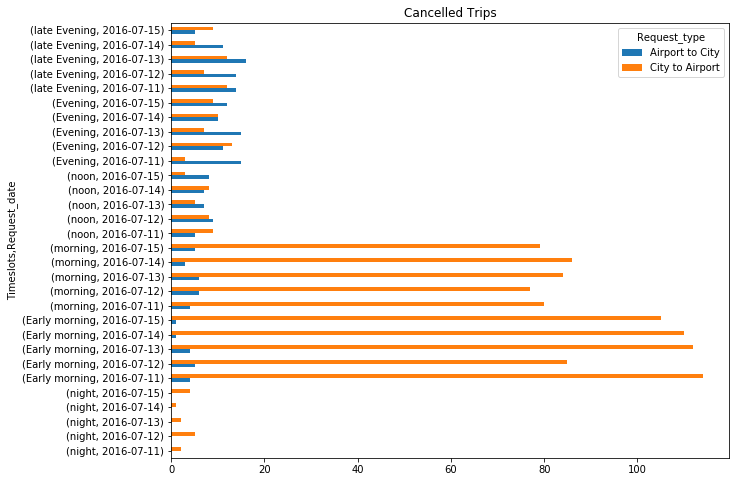

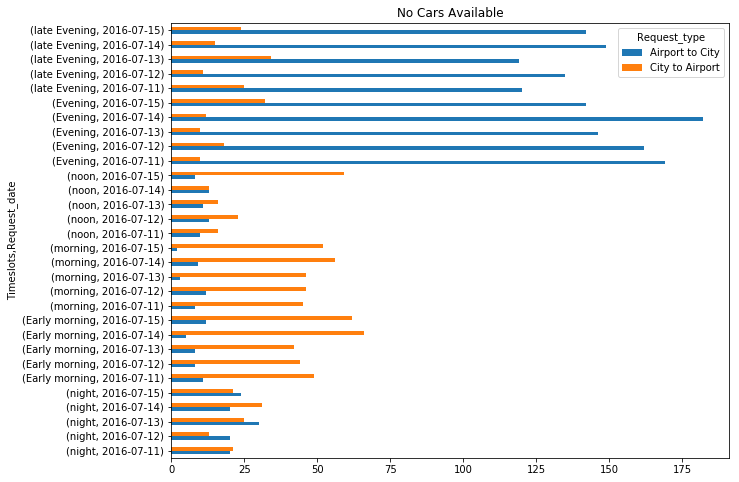

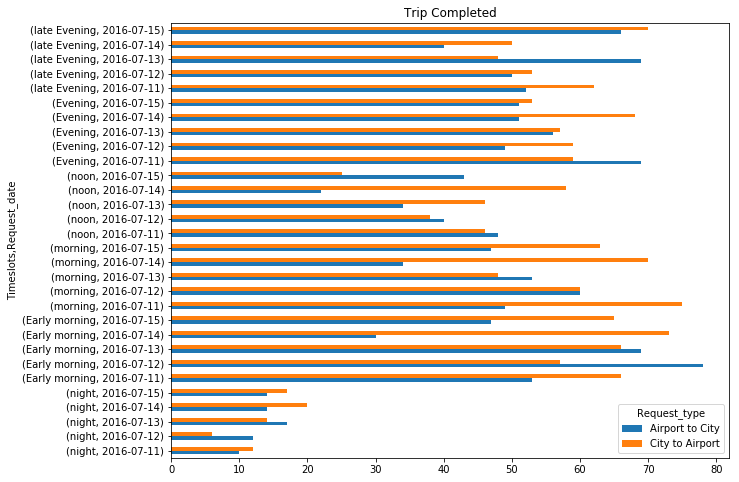

In [16]:
# Ploting cars according to status
group1.plot(kind="barh",align='center', alpha=1.0,figsize=(10,8));plt.title("Cancelled Trips")
group2.plot(kind="barh",align='center', alpha=1.0,figsize=(10,8));plt.title("No Cars Available")
group3.plot(kind="barh",align='center', alpha=1.0,figsize=(10,8));plt.title("Trip Completed")
plt.show()

In [17]:
DM = df.groupby("Status").Request_type.value_counts().unstack()

In [18]:
DM1 = DM.unstack().drop("City to Airport").unstack()
DM2 = DM.unstack().drop("Airport to City").unstack()

In [19]:
DM1 = DM.unstack().drop("City to Airport").unstack()
DM2 = DM.unstack().drop("Airport to City").unstack()

In [20]:
SUP  = df.groupby(["Status","Request_type"]).Timeslots.value_counts().unstack()

In [21]:
SUP1 = SUP.unstack().drop(["Evening","late Evening","morning","night","noon"],1).unstack()
SUP2 = SUP.unstack().drop(["Evening","Early morning","morning","night","noon"],1).unstack()

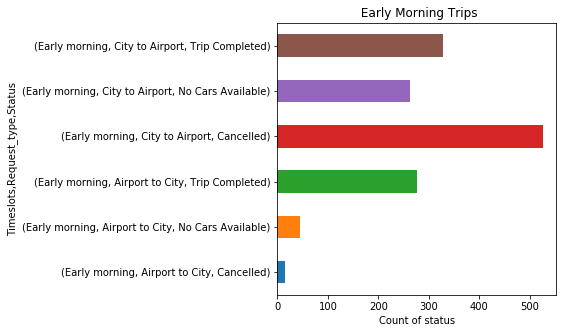

In [22]:
SUP1.plot(kind="barh",align='center', alpha=1.0,figsize=(5,5));plt.xlabel("Count of status");plt.title(" Early Morning Trips")
plt.show()

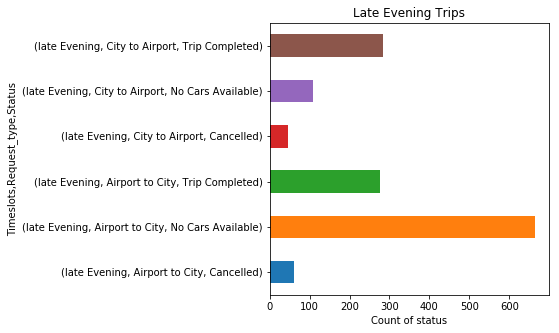

In [23]:
SUP2.plot(kind="barh",align='center', alpha=1.0,figsize=(5,5));plt.xlabel("Count of status");plt.title("Late Evening Trips")
plt.show()